In [1]:
# Carico le librerie matematiche

%pylab inline

# OSCILLATORE ARMONICO

m       = 0.5                   # kg       massa
k       = 1.                    # N/m      costante elastica della molla

omega   = sqrt(k/m)             # 1/s      pulsazione

T       = 2*(2*pi/omega)        # s        tempo finale (2 periodi)  
dt      = 0.0001                # s        passo temporale

N       = int(round(T/dt))      #          numero di istanti temporali considerati

t       = arange(0,T,dt)        # s        creo un vettore con valori del tempo crescenti spaziati di dt
x       = zeros(N)              # m        creo un vettore di zeri che conterrà i valori di x(t) a istanti successivi t         
v       = zeros(N)              # m/s      creo un vettore di zeri che conterrà i valori di v(t) a istanti successivi t 
a       = zeros(N)              # m/s**2   creo un vettore di zeri che conterrà i valori di a(t) a istanti successivi t 

# Dati iniziali:

x[0]    = 0.5                   # m        posizione iniziale
v[0]    = 0                     # m/s      velocità iniziale

# Integrazione numerica dell'equazione differenziale
# Si utilizza a scopo didattico un metodo di integrazione elementare (metodo di Eulero) che richiede un passo dt molto piccolo
# Metodi di integrazione numerica più raffinati sono disponibili nella libreria scipy.integrate.odeint, si veda ad esempio:
# http://nbviewer.ipython.org/gist/dpsanders/d417c1ffbb76f13f678c

for i in range(0,N-1):          
    a[i+1] = -omega**2 * x[i]   # <------- l'accelerazione ora non è più costante!
    v[i+1] = v[i] + a[i] * dt
    x[i+1] = x[i] + v[i] * dt

Populating the interactive namespace from numpy and matplotlib


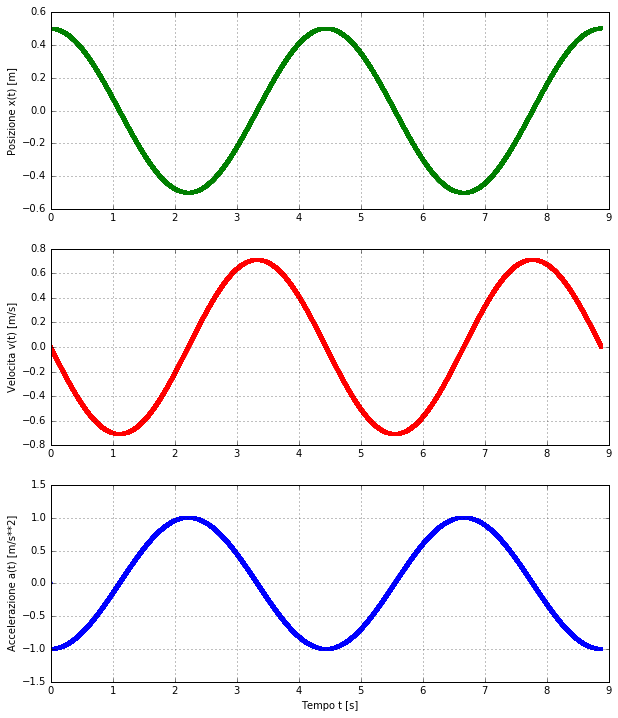

In [2]:
# SI NOTI CHE LE FUNZIONI SIN E COS NON COMPAIONO NEL CODICE
# MA VENGONO CALCOLATE NUMERICAMENTE PER MEZZO DELLE RIGHE
#
# for i in range(0,N-1):          
#     a[i+1] = -omega**2 * x[i]
#     v[i+1] = v[i] + a[i] * dt
#     x[i+1] = x[i] + v[i] * dt

fig=figure(figsize=(10,12))

fig.add_subplot(311)
plot(t,x,'g.')
grid()
ylabel('Posizione x(t) [m]')

fig.add_subplot(312)
plot(t,v,'r.')
grid()
ylabel('Velocita'' v(t) [m/s]')

fig.add_subplot(313)
plot(t,a,'b.')
grid()
ylabel('Accelerazione a(t) [m/s**2]')
xlabel('Tempo t [s]')

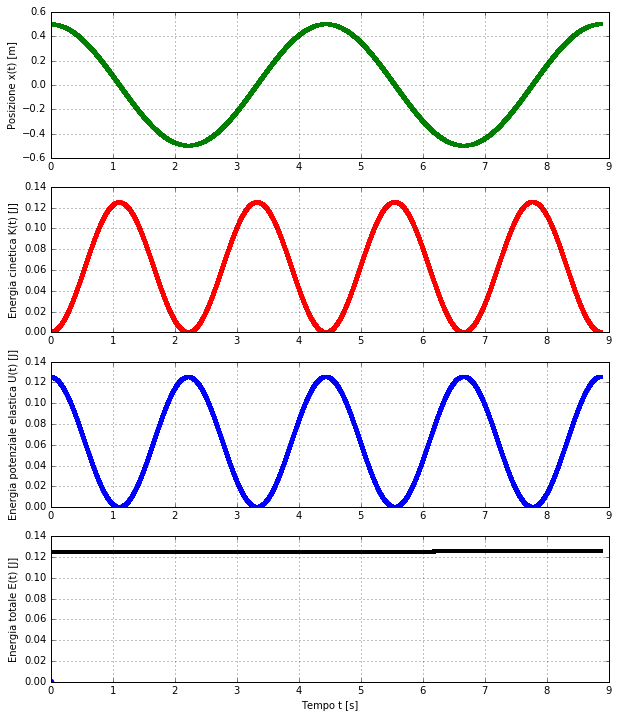

In [3]:
K       = (m/2.)*v**2           # J        energia cinetica
U       = (k/2.)*x**2           # J        energia potenziale elastica
E       = U + K                 # J        energia meccanica totale

# SI NOTI CHE L'ENERGIA NON È ESATTAMENTE CONSERVATA, MA È CONSERVATA
# CON PIÙ PRECISIONE SE SI SCEGLIE dt PIÙ PICCOLO (VERIFICARE!!)
# Controllare la conservazione dell'energia è un buon modo per 
# verificare la precisione di un codice numerico come questo

fig=figure(figsize=(10,12))

fig.add_subplot(411)
plot(t,x,'g.')
grid()
ylabel('Posizione x(t) [m]')

fig.add_subplot(412)
plot(t,K,'r.')
grid()
ylabel('Energia cinetica K(t) [J]')

fig.add_subplot(413)
plot(t,U,'b.')
grid()
ylabel('Energia potenziale elastica U(t) [J]')

fig.add_subplot(414)
plot(t,E,'k.')
plot(0,0,'o')
grid()
xlabel('Tempo t [s]')
ylabel('Energia totale E(t) [J]')

In [4]:
# Il codice che segue serve per realizzare le animazioni e richiede che sia stato installato il software ffmpeg.
# Il codice è stato testato con Chrome; con Firefox il formato video potrebbe non essere riconosciuto.

from matplotlib import animation
from IPython.display import HTML
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, dpi=200, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    close(anim._fig)
    return HTML(anim_to_html(anim))

#animation.Animation._repr_html_ = anim_to_html

In [5]:
# Qui viene realizzata l'animazione del sistema massa-molla

A=sqrt(2*E[0]/k); Kmax=K.max(); Umax=U.max()
w=.2; h=.2; H=.4; skip=200

fig=figure(figsize=(5,2.)); ax=fig.add_subplot(111)
txt=text(.1,.76*H,'t = 0'); text(1.6*A,-.2*H,'K'); text(1.9*A,-.2*H,'U')
axis('equal'); xlabel('x [m]'); ax.set_yticklabels([])
xlim(-2*A,3*A); ylim(-.3,.5); grid(); fig.tight_layout()

mass   = Rectangle( (x[0]-w/2 , -h/2) , w        , h              , facecolor='green') 
spring = Rectangle( (0        , -h/8) , x[0]-w/2 , h/4            , color='black') 
Kbar   = Rectangle( (1.5*A    , 0   ) , w/2      , .8*H*K[0]/Kmax , facecolor='red')
Ubar   = Rectangle( (1.8*A    , 0   ) , w/2      , .8*H*U[0]/Umax , facecolor='blue')

def init():
   ax.add_patch(mass)
   ax.add_patch(spring)
   ax.add_patch(Kbar)   
   ax.add_patch(Ubar)
   return mass,spring,Kbar,Ubar,txt

def update(n): 
   xcm=x[n*skip]
   mass.set_x(xcm-w/2)
   spring.set_width(xcm)
   Kbar.set_height(.8*H*K[n*skip]/Kmax)
   Ubar.set_height(.8*H*U[n*skip]/Umax)
   txt.set_text('t = %4.2f s'%(n*skip*dt))
   return mass,spring,Kbar,Ubar,txt


anim = animation.FuncAnimation(fig, update, init_func=init, frames=N/skip, blit=True)

display_animation(anim)

#anim.save('animation.mp4', fps=20, dpi=200, writer='ffmpeg_file')